In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import os
train_image_files_path = "../Data/dataset_image/"
valid_image_files_path = "../Data/Validation/"

In [19]:
# Đọc danh sách các thư mục trong đường dẫn train_image_files_path
label = [f for f in os.listdir(train_image_files_path) if os.path.isdir(os.path.join(train_image_files_path, f))]
# label.sort()
label

['Cheo cheo Napu (Tragulus napu)',
 'Ciconia episcopus',
 'Eretmochelys imbricata',
 'Graphium antiphates',
 'Great Indian bustard (Ardeotis nigriceps)',
 'Lophura hatinhensis',
 'Lutrogale perspicillata',
 'Neofelis nebulosa',
 'Nicobar pigeon (Caloenas nicobarica nicobarica)',
 'Oriental bay owl (Phodilus badius)',
 'Pavo muticus',
 'Prionailurus viverrinus',
 'Rhincodon typus',
 'Saundersilarus saundersi']

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(
    rescale=1/255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)
validation_data_gen = ImageDataGenerator(
    rescale=1/255,
    # rotation_range=40,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)

In [21]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(200, 200),
    class_mode='sparse'  # Use 'sparse' for integer labels
)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),
    class_mode='sparse'  # Use 'sparse' for integer labels
)

Found 4372 images belonging to 14 classes.
Found 1239 images belonging to 14 classes.


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
# Define the model
model = Sequential()

#CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

#CNN2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#CNN3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten the output
model.add(Flatten())
# Hidden layer
model.add(Dense(512, activation='relu'))
# Output layer
model.add(Dense(14, activation='softmax'))  # 14 classes, softmax for probabilities




In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy
              metrics=['acc'])



In [24]:
# Train the model for 100 epochs, with 3 steps per epoch
EPOCHS = 100
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=3,  # Set steps_per_epoch to 3
    validation_data=validation_generator
)


Epoch 1/100
3/3 [==============================] - 19s 9s/step - loss: 5.8956 - acc: 0.0729 - val_loss: 4.1419 - val_acc: 0.0807
Epoch 2/100
3/3 [==============================] - 18s 8s/step - loss: 2.9863 - acc: 0.1354 - val_loss: 2.6494 - val_acc: 0.0565
Epoch 3/100
3/3 [==============================] - 18s 9s/step - loss: 2.5542 - acc: 0.1250 - val_loss: 2.6939 - val_acc: 0.0565
Epoch 4/100
3/3 [==============================] - 18s 9s/step - loss: 2.5665 - acc: 0.0938 - val_loss: 2.5854 - val_acc: 0.1267
Epoch 5/100
3/3 [==============================] - 18s 9s/step - loss: 2.4828 - acc: 0.2396 - val_loss: 2.6388 - val_acc: 0.0654
Epoch 6/100
3/3 [==============================] - 18s 9s/step - loss: 2.2569 - acc: 0.2083 - val_loss: 2.5404 - val_acc: 0.1558
Epoch 7/100
3/3 [==============================] - 18s 9s/step - loss: 2.2121 - acc: 0.2188 - val_loss: 2.4421 - val_acc: 0.2672
Epoch 8/100
3/3 [==============================] - 18s 8s/step - loss: 2.1402 - acc: 0.2812 - val

In [25]:
# Lưu model sau khi huấn luyện
model.save("trained_animal_model.keras")

1/1 [==============================] - 0s 342ms/step


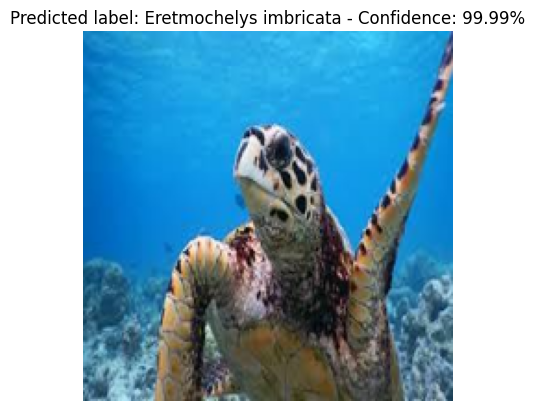

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Hàm dự đoán
def predict_image(image_path):
    # Load ảnh và chuyển đổi về đúng định dạng
    model = load_model("./trained_animal_model.keras")
    img = Image.open(image_path)
    img = img.resize((200, 200))
    img_array = np.array(img) / 255.0  # Rescale về 0-1

    # Thêm một chiều cho batch
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán
    predictions = model.predict(img_array)
    predicted_label = label[np.argmax(predictions)]
    confidence = np.max(predictions) * 100  # Độ chính xác trong phần trăm

    # Hiển thị ảnh và kết quả dự đoán
    plt.imshow(img)
    plt.title(f'Predicted label: {predicted_label} - Confidence: {confidence:.2f}%')
    plt.axis('off')
    plt.show()

file_path = '../Data/Testing/Con_Rua.jpg'
predict_image(file_path)

